#Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Deep learning modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping # To stop overfitting


##Load Dataset

In [ ]:
df = pd.read_csv('/content/housing.csv')
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


##Preprocessing

In [ ]:
df.shape

(20640, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


##Encoding

In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [ ]:
df['ocean_proximity'] = df['ocean_proximity'].map({'<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2,'NEAR BAY':3, 'ISLAND':4})

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


##Train_Test_Split

In [ ]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [ ]:
# Convert to numpy Array
X = np.array(X)
y = np.array(y)

In [ ]:
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  3.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  1.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  1.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  1.0000e+00]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


##Scaling

In [ ]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
X_train # Now the range are in b/w 0 & 1 , for all the values.

array([[0.25809717, 0.50797024, 0.25490196, ..., 0.14635751, 0.28984428,
        0.        ],
       [0.47773279, 0.4357067 , 0.62745098, ..., 0.02844927, 0.20074206,
        0.25      ],
       [0.63663968, 0.16790648, 0.47058824, ..., 0.12465055, 0.21820389,
        0.25      ],
       ...,
       [0.60020243, 0.15621679, 0.80392157, ..., 0.05936524, 0.1792458 ,
        0.        ],
       [0.23380567, 0.53453773, 0.21568627, ..., 0.17365565, 0.33020234,
        0.75      ],
       [0.19433198, 0.55154091, 1.        , ..., 0.10623253, 0.23403125,
        0.75      ]])

##Model Training & Architecture

In [ ]:
X_train.shape

(16346, 9)

In [ ]:
X_train.shape[1]

9

In [ ]:
model = Sequential([
      #input  layer
      Dense(1000, input_shape=(X_train.shape[1],), activation='relu'),
      Dropout(0.2),
      # Two hidden layers
      Dense(500, activation='relu'),
      Dropout(0.2),
      Dense(250, activation='relu'),
      #output layer
      Dense(1, activation='linear')  # The problem is regression that's why using "Linear"as activation.
                    ])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True) # Save model from overfitting

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[es], batch_size=50, verbose=1)

Epoch 1/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 41711783936.0000 - mae: 168342.5781 - val_loss: 11729143808.0000 - val_mae: 84253.2109
Epoch 2/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 10593815552.0000 - mae: 81630.2891 - val_loss: 8863806464.0000 - val_mae: 73614.4375
Epoch 3/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7736018432.0000 - mae: 68575.3828 - val_loss: 6194335232.0000 - val_mae: 59443.1719
Epoch 4/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5893966336.0000 - mae: 56838.3828 - val_loss: 5917076992.0000 - val_mae: 57233.1445
Epoch 5/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5931530752.0000 - mae: 56438.7266 - val_loss: 5759768576.0000 - val_mae: 56009.7305
Epoch 6/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5556358144.0000 - mae: 54622.8945 - val_loss: 5675159552.0000 - val_mae: 53681.2031
Epoch 7/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5452992000.0000 - mae: 53331.2500 - val_loss: 5450939392.0000 - val_mae

##Models Results and Metrics

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error,mean_absolute_error
y_pred = model.predict(X_test)
print("score : ", r2_score(y_test, y_pred))
print("mse :", mean_squared_error(y_test, y_pred))
print("mae :", mean_squared_log_error(y_test, y_pred))
print("mae :", mean_absolute_error(y_test, y_pred))

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
score :  0.6201716809106145
mse : 5194220931.208338
mae : 0.11744761590842019
mae : 50251.848406055025


##Get the training and validation loss from the history object

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

In [ ]:
epochs

range(1, 11)

##Plot the training and validation loss

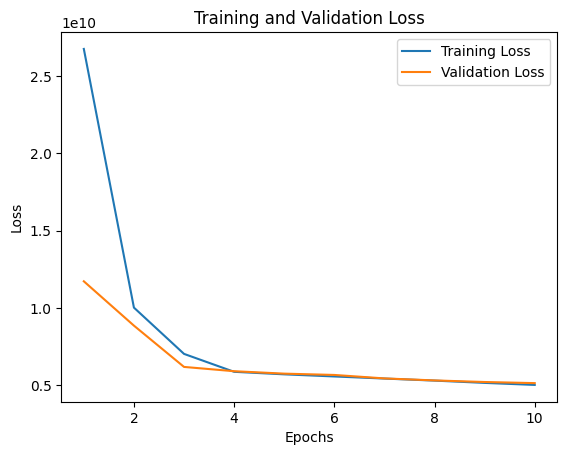

In [ ]:
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

**The graph shows both training and validation losses decreasing and stabilizing, indicating effective learning with no signs of overfitting.**\
**The model generalizes well to validation data.**